# Clustering the Countries by using K-means, Heirarchical and PCA

### Objective

To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### Problem Statement

HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, My job as a Data analyst is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then I need to suggest the countries which the CEO needs to focus on the most.

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Country-data.csv")

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Exploratory Data Analysis

In [4]:
data.shape

(167, 10)

In [5]:
data.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Here, exports, heath and imports variables are in percenatge of the total GDP format. So, it is converted into actual value on the basis of GDPP as below since, GDP data and population data is not present in the data set.

In [7]:
data['exports'] = data['exports']*data['gdpp']/100
data['imports'] = data['imports']*data['gdpp']/100
data['health'] = data['health']*data['gdpp']/100

In [8]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


In [9]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,7420.618847,1056.733204,6588.352108,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,17973.885795,1801.408906,14710.810418,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,447.140000,78.535500,640.215000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,1777.440000,321.886000,2045.580000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,7278.000000,976.940000,7719.600000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,183750.000000,8663.600000,149100.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


<AxesSubplot:>

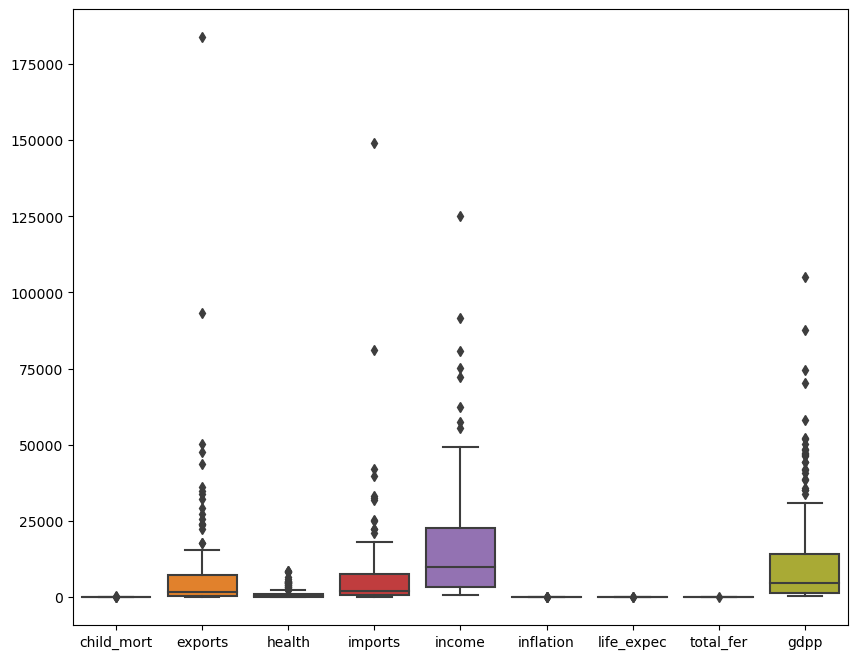

In [10]:
fig = plt.figure(figsize=(10,8))
sns.boxplot(data=data)

In [11]:
data['country'].nunique()

167

<AxesSubplot:>

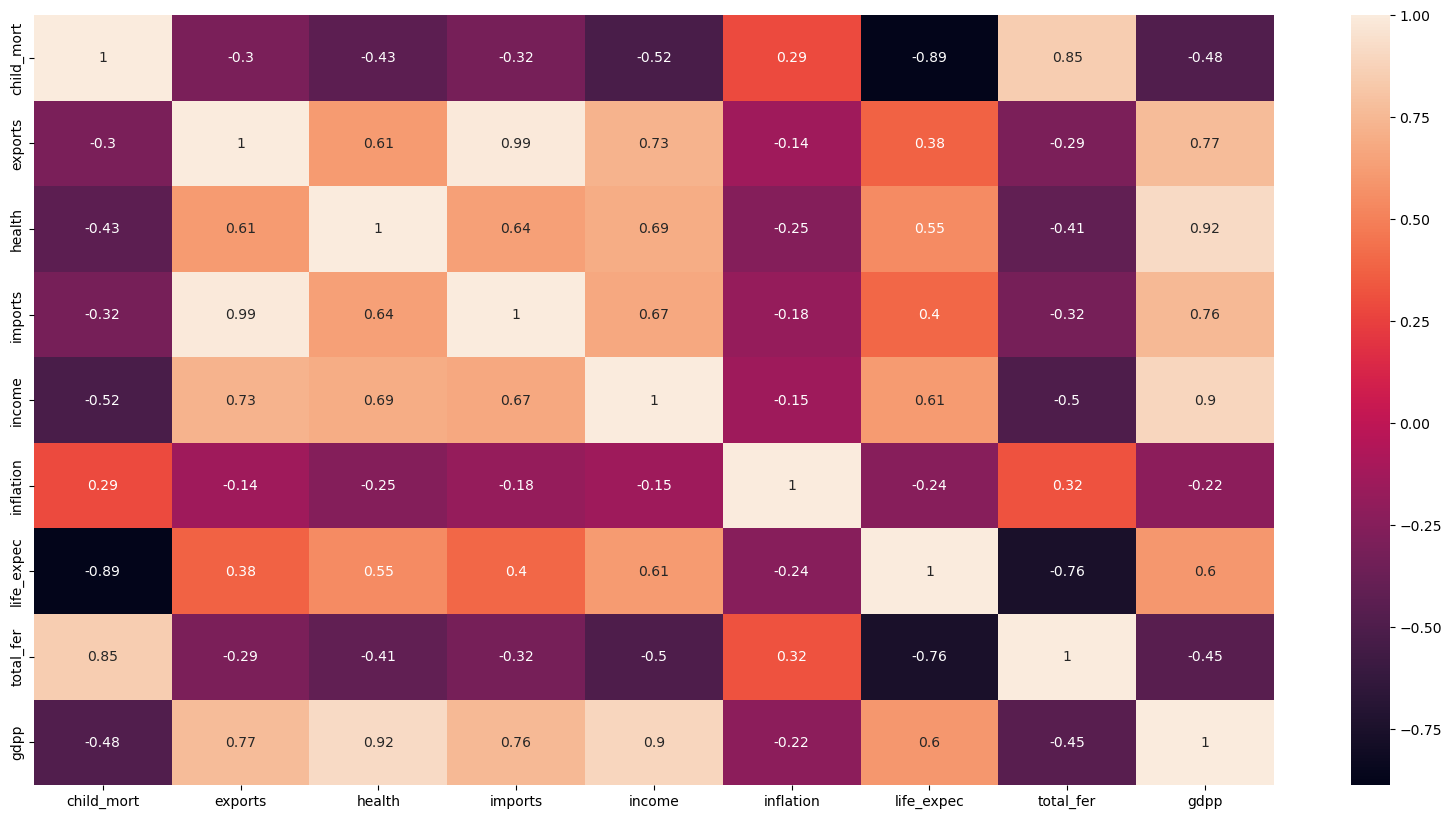

In [12]:
plt.figure(figsize = (20,10))
sns.heatmap(data.corr(),annot = True)

from above heatmap, we can see exports is highly correlated with import. health, exports, income,imports are highly correlated with gdpp. So, it will be treated after performing PCA.

### Performing PCA on the data ( Principal Component Analysis)

In [13]:
from sklearn.preprocessing import StandardScaler
data1 = data.drop('country', axis = 1)
standard_scaler = StandardScaler()
Country_scaled = standard_scaler.fit_transform(data1)

In [15]:
from sklearn.decomposition import PCA

pca = PCA(svd_solver='randomized', random_state=42)
# fiting PCA on the dataset
pca.fit(Country_scaled)

PCA(random_state=42, svd_solver='randomized')

In [16]:
pca.components_

array([[-0.31639186,  0.34288671,  0.358535  ,  0.34486492,  0.38004113,
        -0.14308531,  0.34385651, -0.30284224,  0.39998795],
       [ 0.47626735,  0.39731091,  0.1550529 ,  0.37078075,  0.12838448,
         0.22126089, -0.36981973,  0.4597152 ,  0.2006241 ],
       [-0.15001225, -0.03057367, -0.07570322, -0.07217386,  0.14576421,
         0.94841868,  0.19675173, -0.07783431,  0.01033941],
       [-0.14805195,  0.44942527, -0.59971228,  0.46179779, -0.15480592,
        -0.00762798, -0.01839465, -0.21392805, -0.36477239],
       [ 0.1019948 , -0.03853829, -0.49319984, -0.2527867 ,  0.79407469,
        -0.13642345, -0.15404105, -0.02033568,  0.08750149],
       [ 0.19658519, -0.03891112,  0.18069888, -0.01217988, -0.03814681,
         0.10840284, -0.58600986, -0.75390075,  0.04538167],
       [ 0.76126725, -0.01366973, -0.06461567,  0.02718244, -0.02311312,
        -0.02207663,  0.58120846, -0.27314534, -0.04402264],
       [ 0.00644411, -0.05526371,  0.43007213,  0.1311355 ,  0

In [17]:
pca.explained_variance_ratio_

array([5.89372984e-01, 1.84451685e-01, 9.91147170e-02, 6.07227801e-02,
       3.02917253e-02, 2.45982702e-02, 9.39743701e-03, 1.55641971e-03,
       4.93981394e-04])

### Plotting the scree plot

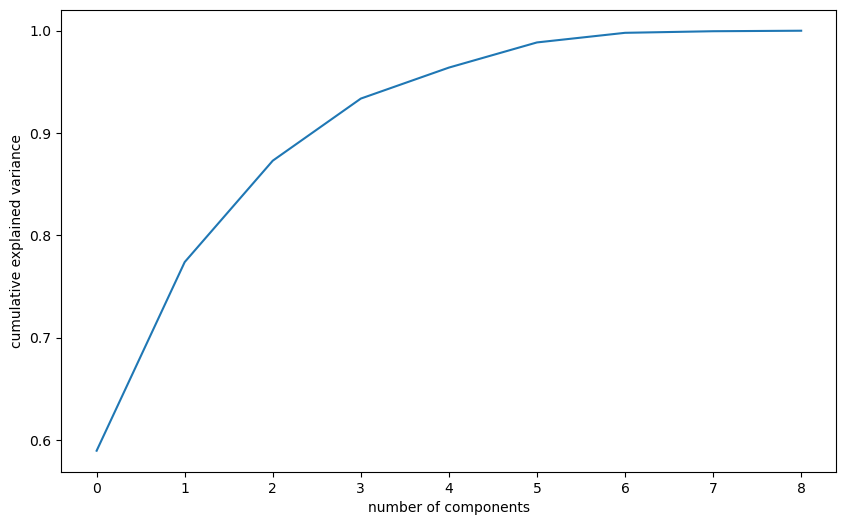

In [20]:
plt.figure(figsize = (10,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

We can see that around 5 components explain 98% of the variance

It will also be usual to look at how much of each feature is explained in the Principal components.

In [22]:
columns = data1.columns
pcs_df = pd.DataFrame({ 'Original Feature':columns,'PC1':pca.components_[0],'PC2':pca.components_[1],'PC3':pca.components_[2],
                       'PC4':pca.components_[3],'PC5':pca.components_[4]})
pcs_df

,Original Feature,PC1,PC2,PC3,PC4,PC5
0,child_mort,-0.316392,0.476267,-0.150012,-0.148052,0.101995
1,exports,0.342887,0.397311,-0.030574,0.449425,-0.038538
2,health,0.358535,0.155053,-0.075703,-0.599712,-0.493200
3,imports,0.344865,0.370781,-0.072174,0.461798,-0.252787
4,income,0.380041,0.128384,0.145764,-0.154806,0.794075
5,inflation,-0.143085,0.221261,0.948419,-0.007628,-0.136423
6,life_expec,0.343857,-0.369820,0.196752,-0.018395,-0.154041
7,total_fer,-0.302842,0.459715,-0.077834,-0.213928,-0.020336
8,gdpp,0.399988,0.200624,0.010339,-0.364772,0.087501


In [23]:
#Finally let's go ahead and do dimenstionality reduction using the five Principal Components
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=5)

In [24]:
df_pca = pca_final.fit_transform(Country_scaled)
df_pca.shape

(167, 5)

In [25]:
pc = np.transpose(df_pca)

In [26]:
corrmat = np.corrcoef(pc)

<AxesSubplot:>

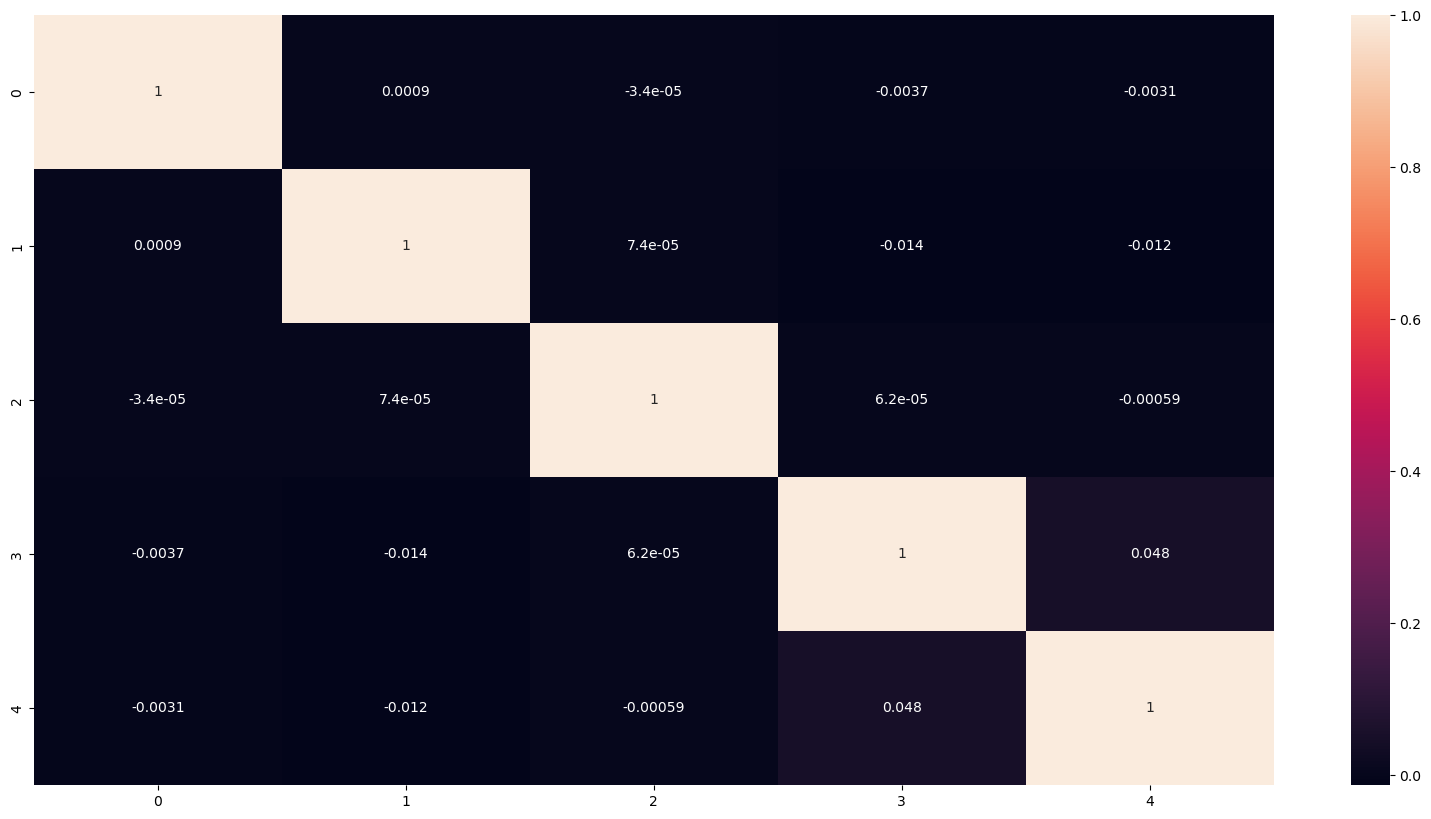

In [27]:
plt.figure(figsize = (20,10))
sns.heatmap(corrmat,annot = True)

In [28]:
#Converting to dataframe
df_pca = pd.DataFrame(df_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


Plotting two dimensions to visualise

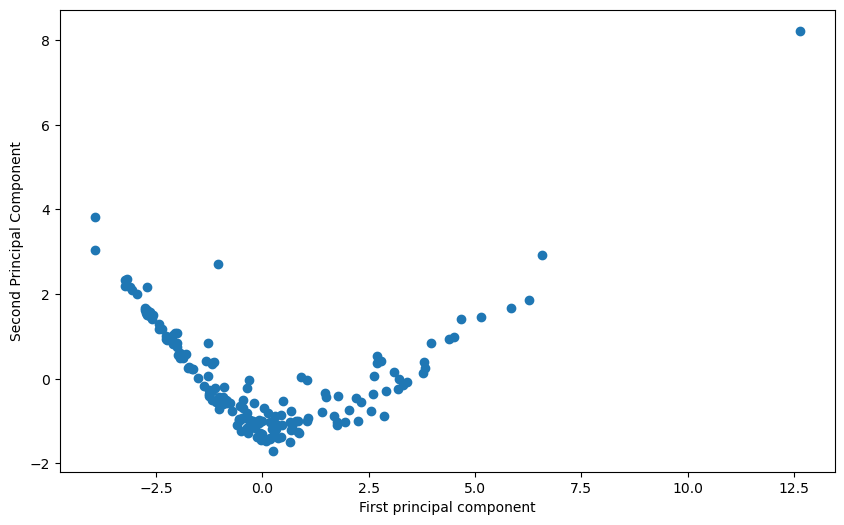

In [30]:
plt.figure(figsize=(10,6))
plt.scatter(df_pca['PC1'],df_pca['PC2'])
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
plt.show()

# Clustering

Let us perform kmeans clustering. We need to also identify what number of clusters are suitable for the data. This can be done using two methods:

1. Elbow method (using concept of inertia)
2. Sillhoute score

Before that, let us identify how suitable the data is for clustering using the Hopkin's statistic

In [31]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


In [32]:
print('The Hopkins statistic for this data is')
print(hopkins(df_pca))

The Hopkins statistic for this data is
0.9619728633251861


The value of Hopkins Statistic is close to 1 which indicates the data can be clustered

In [33]:
#Creating copy of dataset to use
df_a = df_pca
df_b = df_pca

In [40]:
from sklearn.cluster import KMeans

In [57]:
ssd = [] # An empty list for sum of squared distances to be appended for k values 2 to 10

for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_a)
    ssd.append(kmeans.inertia_)

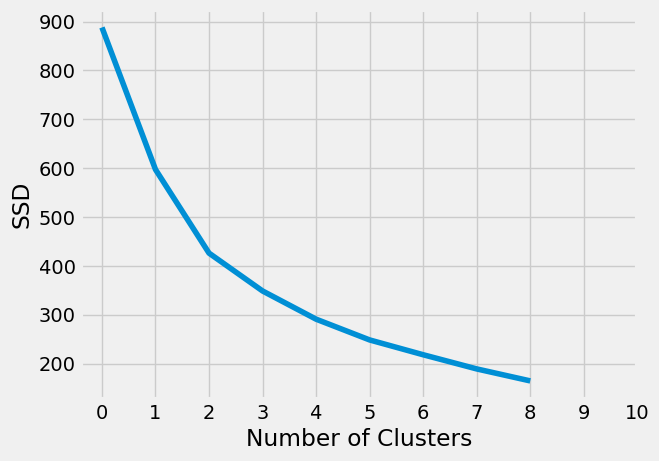

In [58]:
#Elbow graph
plt.plot(ssd)
plt.xticks(range(0, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSD")
plt.show()


From the elbow graph, roughly 3 clusters seems to be appropriate for our data.

### Verify the number of clusters using sillhoute score


The silhouette coefficient is a measure of cluster cohesion and separation. It quantifies how well a data point fits into its assigned cluster based on two factors:

How close the data point is to other points in the cluster How far away the data point is from points in other clusters Silhouette coefficient values range between -1 and 1. Larger numbers indicate that samples are closer to their clusters than they are to other clusters.

In [45]:
from sklearn.metrics import silhouette_score
silhouette_coefficients = []

# Notice you start at 2 clusters for silhouette coefficient

for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df_b)
    score = silhouette_score(df_b, kmeans.labels_)
    silhouette_coefficients.append(score)

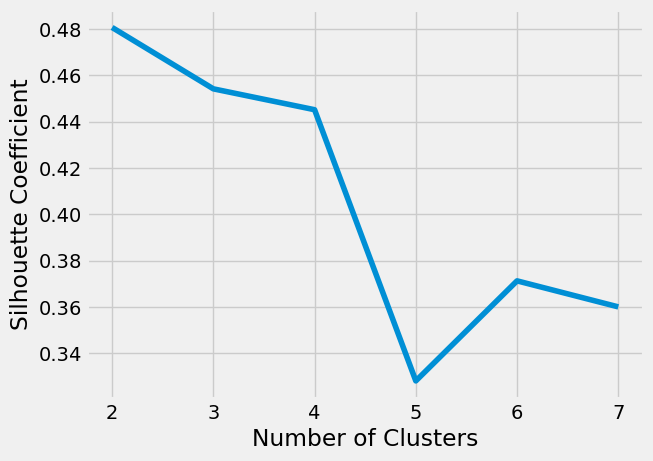

In [60]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,8), silhouette_coefficients)
plt.xticks(range(2, 8))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

Thus, let us proceed with number of clusters as 3

In [61]:
df_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-2.636338,1.472260,-0.548330,0.238302,0.061003
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128
3,-2.723472,2.174966,0.597397,0.417695,0.056694
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087


In [65]:
model = KMeans(n_clusters=3, max_iter=50,random_state = 50)
model.fit(df_pca)

KMeans(max_iter=50, n_clusters=3, random_state=50)

In [66]:
labels = pd.DataFrame(model.labels_)
labels.columns = ['ClusterID']
labels.head()

,ClusterID
0,2
1,1
2,1
3,2
4,1


In [68]:
#Creating dataset with Cluster information included
df_final = pd.concat([df_pca, labels], axis=1)
df_final.head()

,PC1,PC2,PC3,PC4,PC5,ClusterID
0,-2.636338,1.472260,-0.548330,0.238302,0.061003,2
1,-0.023783,-1.435535,-0.015470,-0.428278,-0.154305,1
2,-0.459228,-0.679705,0.956537,-0.193531,-0.092128,1
3,-2.723472,2.174966,0.597397,0.417695,0.056694,2
4,0.649103,-1.026404,-0.258645,-0.276882,0.077087,1


In [69]:
df_final['ClusterID'].value_counts()

1    91
2    48
0    28
Name: ClusterID, dtype: int64

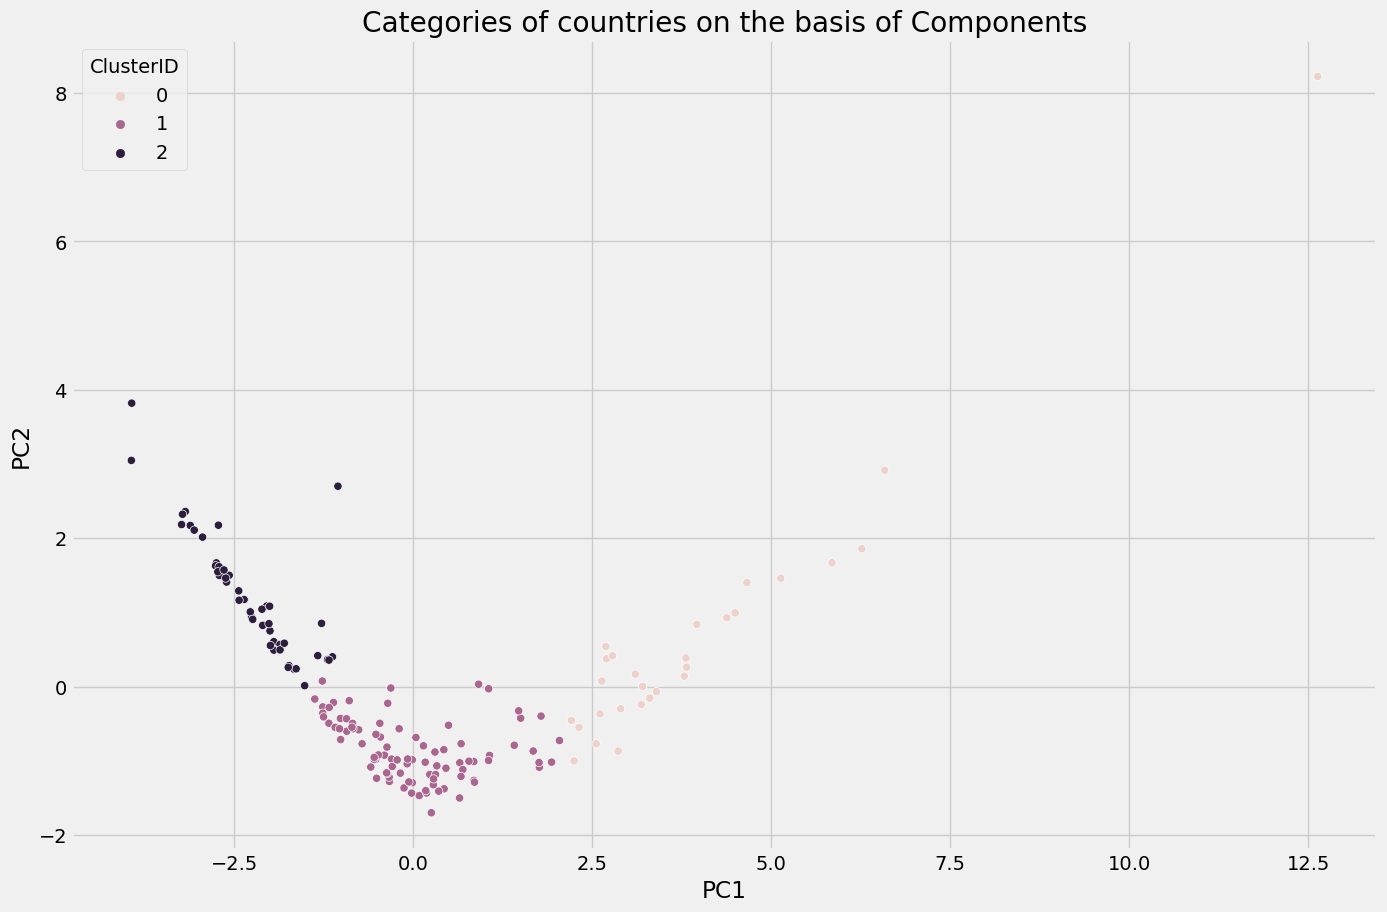

In [70]:
#Now let us visualise the clusters on the data

fig = plt.figure(figsize = (15,10))
sns.scatterplot(x='PC1',y='PC2',hue='ClusterID',legend='full',data=df_final)

plt.title('Categories of countries on the basis of Components')
plt.show()